# Section 5 - Exercise 1: Image Generation with Replicate

**Goal:** Learn how to use the Replicate platform to run a fast text-to-image model (FLUX.Dev), understand the basic workflow, and generate images from your own prompts.

## Part 1: Introduction & Theory

### What is Replicate?

Replicate is a platform that makes it easy to run machine learning models via a simple API, without needing to manage the underlying infrastructure (like GPUs). You can find and run thousands of pre-trained models for various tasks like image generation, text generation, audio processing, and more.

**Why use Replicate?**

*   **Simplicity:** Run complex models with just a few lines of code.
*   **Scalability:** Replicate handles scaling automatically.
*   **Variety:** Access a vast library of cutting-edge models.
*   **Cost-Effective:** Pay only for the compute time you use.

### What are FLUX Models?

FLUX is a new family of text-to-image generation models designed for high performance and quality. They are known for their speed and efficiency.

*   **FLUX.Schnell:** This is a distilled version optimized for *very fast* inference, making it great for rapid prototyping or applications needing quick image generation. While extremely fast, the output quality might be slightly lower than its larger counterpart.
*   **FLUX.1:** The larger, higher-quality version, offering state-of-the-art image generation capabilities (we might explore this later).

In this exercise, we'll focus on using **FLUX.Schnell** via Replicate.

## Part 2: Setup

First, we need to install the necessary Python libraries and set up our Replicate API token.

In [ ]:
# Install required libraries (if you haven't already)
# Uncomment the line below if you need to install
# !pip install replicate python-dotenv requests ipython

Next, ensure you have a file named `.env` in the root directory of this project (`genai-course`) with your Replicate API token:

```
REPLICATE_API_KEY=your_api_token_here
```

Replace `your_api_token_here` with your actual token obtained from your [Replicate account settings](https://replicate.com/account).

In [1]:
import replicate
import os
from dotenv import load_dotenv
import requests
import time
from IPython.display import Image, display # To display images in the notebook

# Load environment variables from .env file (searches current dir and parents)
load_dotenv()

api_token = os.getenv("REPLICATE_API_KEY")
os.environ["REPLICATE_API_TOKEN"] = api_token

if not api_token:
    print("⚠️ Warning: REPLICATE_API_TOKEN not found.")
    print("   Please ensure a .env file exists in the project root directory")
    print("   with the line: REPLICATE_API_TOKEN=your_actual_token")
else:
    print("✅ Replicate API Token loaded successfully.")

✅ Replicate API Token loaded successfully.


## Part 3: Generate Images

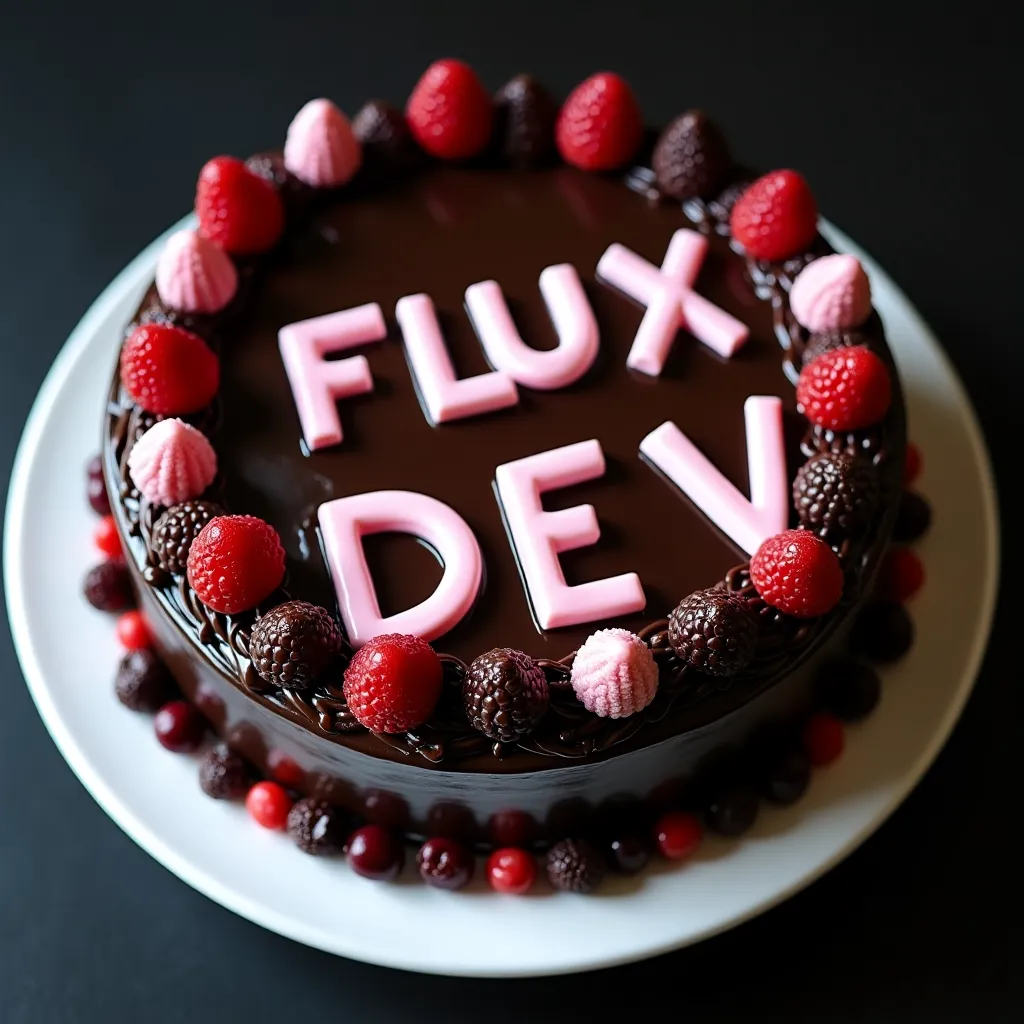

In [19]:
import replicate

input = {
    "prompt": "black forest gateau cake spelling out the words \"FLUX DEV\", tasty, food photography, dynamic shot",
    "guidance": 3.5
}

output = replicate.run(
    "black-forest-labs/flux-dev",
    input=input
)
for index, item in enumerate(output):
    with open(f"../images/output_{index}.webp", "wb") as file:
        file.write(item.read())
#=> output_0.webp written to disk
display(Image(filename='../images/output_0.webp'))

## Part 4: Generate Images with More Parameters

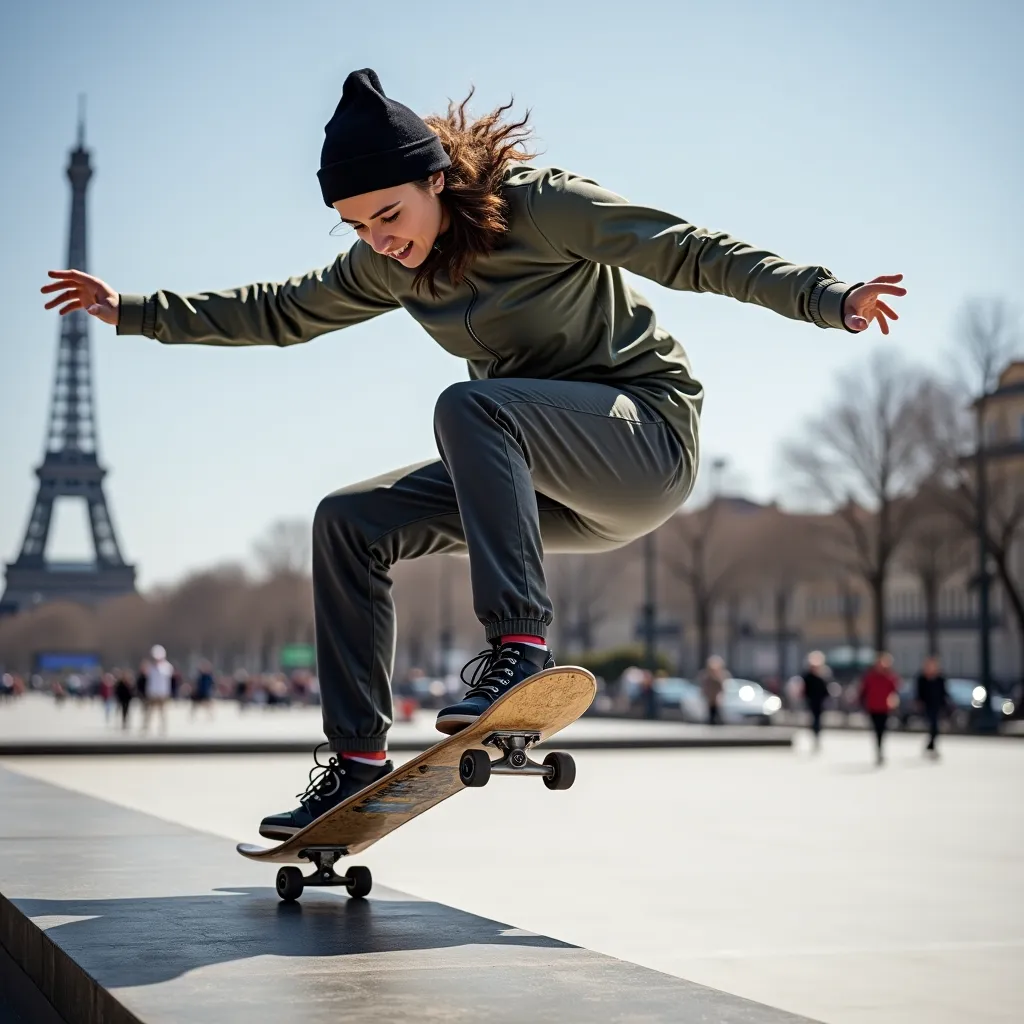

In [ ]:
input={
    "seed": 17536,
    "prompt": "womens street skateboarding final in Paris Olympics 2024",
    "go_fast": True,
    "guidance": 3.5,
    "num_outputs": 1,
    "aspect_ratio": "1:1",
    "output_format": "webp",
    "output_quality": 80,
    "prompt_strength": 0.8,
    "num_inference_steps": 28
}

output = replicate.run(
    "black-forest-labs/flux-dev",
    input = input

)

for index, item in enumerate(output):
    with open(f"../images/skateboarding_{index}.webp", "wb") as file:
        file.write(item.read())
display(Image(filename='../images/skateboarding_0.webp'))

## Part 5: Homework

1.  **Experiment with Parameters:** Look at the [FLUX.Schnell model page on Replicate](https://replicate.com/black-forest-labs/flux-schnell). Find another parameter besides `prompt` (e.g., `width`, `height`, `num_inference_steps`, `seed`). Modify the `input_data_exercise` dictionary in the cell above to include one of these parameters with a different value and run it again. Does the output change? How?
2.  **Try a Different Prompt Style:** Think of a completely different style or subject for your prompt (e.g., photorealistic, pixel art, abstract, a specific animal, a landscape). Run the exercise cell again with this new prompt.
3.  **(Optional) Error Handling:** What happens if you provide an invalid `REPLICATE_API_TOKEN` in your `.env` file? Try it (remember to change it back afterwards!) and observe the error message in the Setup and Run cells.


In [ ]:
# solution here:


## End of Exercise 1

Congratulations! You've run the FLUX Dev and schnell models, compared their outputs, experimented with parameters, and dev models, seen a demonstration, and generated an image with your own prompt. You also have some ideas for further experimentation.